### Here we read data generated in Subtask 5.1 to perform DNN-SE

# Import required libraries

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.backend import gradients
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from tensorflow.keras import regularizers
from sklearn.utils import shuffle
from tensorflow.keras import losses
import h5py
from tensorflow.keras.layers import LeakyReLU
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from time import time 
import random


np.random.seed(123)
random.seed(123)
tf.random.set_seed(123)

In [4]:
#Import Training Dataset

x_train = pd.read_csv('x_train_Gaussian.csv', header = None)
y_train = pd.read_csv('y_train_Gaussian.csv', header = None)

#Import Test Dataset
x_test = pd.read_csv('x_test_Gaussian.csv', header = None)
y_test = pd.read_csv('y_test_Gaussian.csv', header = None)


#Convert to numpy
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()


In [5]:
y_test.shape

(2500, 924)

# Normalization Process 

In [6]:
def normalize(x):
    
    x_min = np.amin(x)
    x_max = np.amax(x)
    x_norm = (x-x_min)/(x_max-x_min)
    
    return x_norm,x_min,x_max

In [7]:
#Normalizing Data
x_normalized_train = np.zeros(x_train.shape) 
y_normalized_train = np.zeros(y_train.shape)  
x_normalized_test = np.zeros(x_test.shape)
y_normalized_test = np.zeros(y_test.shape)  


for i in range(x_train.shape[1]):
    t1,x_min,x_max = normalize(x_train[:,i])
    x_normalized_train[:,i] = t1
    x_normalized_test[:,i] = (x_test[:,i]-x_min)/(x_max-x_min)
    

for j in range(y_train.shape[1]):
    t2,y_min,y_max = normalize(y_train[:,j])
    y_normalized_train[:,j] = t2
    y_normalized_test[:,j] = (y_test[:,j]-y_min)/(y_max-y_min)


# x_normalized_test = (x_test-x_min)/(x_max-x_min)
# y_normalized_test = (y_test-y_min)/(y_max-y_min)

C:\Users\smoshta1\AppData\Local\Temp\4\ipykernel_97044\3391188138.py:5: RuntimeWarning: invalid value encountered in true_divide
  x_norm = (x-x_min)/(x_max-x_min)
C:\Users\smoshta1\AppData\Local\Temp\4\ipykernel_97044\1985882978.py:11: RuntimeWarning: invalid value encountered in true_divide
  x_normalized_test[:,i] = (x_test[:,i]-x_min)/(x_max-x_min)


In [8]:
main_y_train = y_train
main_x_train = x_train
main_y_test = y_test
main_x_test = x_test

### Data cleaning

In [11]:
max_x_train = np.amax(x_normalized_train)
min_x_train = np.amin(x_normalized_train)
max_x_test = np.amax(x_normalized_test)
min_x_test = np.amin(x_normalized_test)

max_y_train = np.amax(y_normalized_train)
min_y_train = np.amin(y_normalized_train)
max_y_test = np.amax(y_normalized_test)
min_y_test = np.amin(y_normalized_test)

print('max_x_train = ',max_x_train,'\n',
      'min_x_train = ',min_x_train,'\n',
      'max_x_test= ',max_x_test,'\n',
      'min_x_test',min_x_test,'\n',
      'max_y_train = ',max_y_train,'\n',
      'min_y_train = ',min_y_train,'\n',

      'max_y_test= ',max_y_test,'\n',
      'min_y_test',min_y_test,'\n',
     )

max_x_train =  1.0 
 min_x_train =  0.0 
 max_x_test=  1.0549412867272407 
 min_x_test -0.059339470434111974 
 max_y_train =  1.0 
 min_y_train =  0.0 
 max_y_test=  1.0298498386519295 
 min_y_test -0.058500452961392634 



In [10]:
y_normalized_train[np.isnan(y_normalized_train)] = 0
y_normalized_test[np.isnan(y_normalized_test)] = 0
x_normalized_train[np.isnan(x_normalized_train)] = 0
x_normalized_test[np.isnan(x_normalized_test)] = 0

In [12]:
# split train and validation 
x_train, x_val, y_train, y_val = train_test_split(x_normalized_train, y_normalized_train, test_size=0.2)

x_test = x_normalized_test
y_test = y_normalized_test

# Build the neural network

Epoch 1/100
248/250 [============================>.] - ETA: 0s - loss: 0.8124 - MSE: 0.8124
Epoch 1: val_loss improved from inf to 0.15296, saving model to weights.best.hdf5
250/250 [==============================] - 7s 20ms/step - loss: 0.8073 - MSE: 0.8073 - val_loss: 0.1530 - val_MSE: 0.1530 - lr: 0.0010
Epoch 2/100
249/250 [============================>.] - ETA: 0s - loss: 0.0782 - MSE: 0.0782
Epoch 2: val_loss improved from 0.15296 to 0.01867, saving model to weights.best.hdf5
250/250 [==============================] - 4s 18ms/step - loss: 0.0780 - MSE: 0.0780 - val_loss: 0.0187 - val_MSE: 0.0187 - lr: 0.0010
Epoch 3/100
250/250 [==============================] - ETA: 0s - loss: 0.0238 - MSE: 0.0238
Epoch 3: val_loss improved from 0.01867 to 0.01264, saving model to weights.best.hdf5
250/250 [==============================] - 5s 18ms/step - loss: 0.0238 - MSE: 0.0238 - val_loss: 0.0126 - val_MSE: 0.0126 - lr: 0.0010
Epoch 4/100
249/250 [============================>.] - ETA: 0s - 

Epoch 28/100
247/250 [============================>.] - ETA: 0s - loss: 0.0079 - MSE: 0.0079
Epoch 28: val_loss improved from 0.00657 to 0.00652, saving model to weights.best.hdf5
250/250 [==============================] - 5s 19ms/step - loss: 0.0079 - MSE: 0.0079 - val_loss: 0.0065 - val_MSE: 0.0065 - lr: 0.0010
Epoch 29/100
249/250 [============================>.] - ETA: 0s - loss: 0.0077 - MSE: 0.0077
Epoch 29: val_loss improved from 0.00652 to 0.00633, saving model to weights.best.hdf5
250/250 [==============================] - 5s 19ms/step - loss: 0.0077 - MSE: 0.0077 - val_loss: 0.0063 - val_MSE: 0.0063 - lr: 0.0010
Epoch 30/100
249/250 [============================>.] - ETA: 0s - loss: 0.0075 - MSE: 0.0075
Epoch 30: val_loss improved from 0.00633 to 0.00622, saving model to weights.best.hdf5
250/250 [==============================] - 5s 19ms/step - loss: 0.0075 - MSE: 0.0075 - val_loss: 0.0062 - val_MSE: 0.0062 - lr: 0.0010
Epoch 31/100
248/250 [============================>.] -

248/250 [============================>.] - ETA: 0s - loss: 0.0058 - MSE: 0.0058
Epoch 84: val_loss improved from 0.00485 to 0.00484, saving model to weights.best.hdf5
250/250 [==============================] - 5s 18ms/step - loss: 0.0058 - MSE: 0.0058 - val_loss: 0.0048 - val_MSE: 0.0048 - lr: 1.0000e-04
Epoch 85/100
248/250 [============================>.] - ETA: 0s - loss: 0.0059 - MSE: 0.0059
Epoch 85: val_loss did not improve from 0.00484
250/250 [==============================] - 4s 17ms/step - loss: 0.0058 - MSE: 0.0058 - val_loss: 0.0048 - val_MSE: 0.0048 - lr: 1.0000e-04
Epoch 86/100
249/250 [============================>.] - ETA: 0s - loss: 0.0057 - MSE: 0.0057
Epoch 86: val_loss did not improve from 0.00484
250/250 [==============================] - 4s 18ms/step - loss: 0.0057 - MSE: 0.0057 - val_loss: 0.0048 - val_MSE: 0.0048 - lr: 1.0000e-04
Epoch 87/100
250/250 [==============================] - ETA: 0s - loss: 0.0059 - MSE: 0.0059
Epoch 87: val_loss did not improve from 0

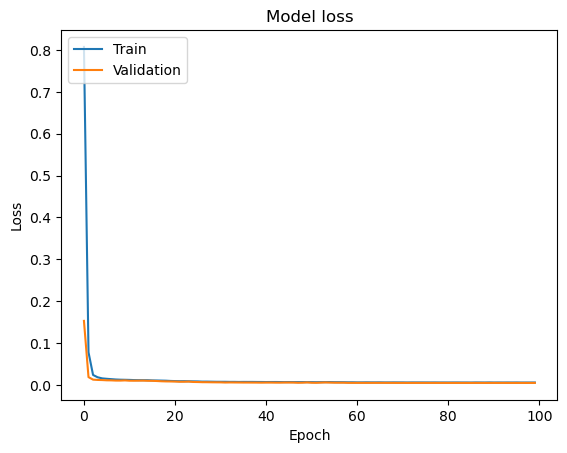

In [13]:
dp = 0.5 # set Dropout rate 
nu = 600 # number of neurons in each layer 
ne = 100 # number of epochs

#################################### Model Architecture #############################################
model = Sequential()

model.add(Dense(nu, activation='relu', input_dim=x_train.shape[1], kernel_initializer='he_normal')) # Hidden 1
model.add(BatchNormalization())
model.add(Dropout(dp))

model.add(Dense(nu, activation='relu', kernel_initializer='he_normal')) # Hidden 2
model.add(BatchNormalization())
model.add(Dropout(dp))

model.add(Dense(nu, activation='relu', kernel_initializer='he_normal')) # Hidden 3
model.add(BatchNormalization())
model.add(Dropout(dp))

model.add(Dense(nu, activation='relu', kernel_initializer='he_normal')) # Hidden 4
model.add(BatchNormalization())
model.add(Dropout(dp))

model.add(Dense(nu, activation='relu', kernel_initializer='he_normal')) # Hidden 5
model.add(BatchNormalization())
model.add(Dropout(dp))

model.add(Dense(nu, activation='relu', kernel_initializer='he_normal')) # Hidden 6

# model.add(Dense(300, activation='relu', kernel_initializer='he_normal')) # Hidden 7



model.add(Dense(y_train.shape[1], activation='linear',kernel_initializer='he_normal')) # Output

################################## Model Configuration #####################################

loss_fn = losses.MeanSquaredError() # set loss function 
Adam(learning_rate=0.09456, beta_1=0.9, beta_2=0.999, amsgrad=False) # set configuration of Optimizer
model.compile(loss=loss_fn, optimizer='adam', metrics=['MSE'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=10, min_lr=0.0001)
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath,save_weights_only=True, monitor='val_loss', verbose=1, save_best_only=True, mode='min')



history = model.fit(x_train,y_train,verbose=1,epochs=ne , validation_data = (x_val,y_val),callbacks=[checkpoint,reduce_lr])


    
# plot training history
plt.figure()
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')


In [14]:
# Evaluation
start_SE = time()
pred = model.predict(x_test)
end_SE = time()
elapsed_time = end_SE - start_SE

pred_actual = np.zeros(y_test.shape)

for j in range(main_y_train.shape[1]):
    t2,y_min,y_max = normalize(main_y_train[:,j])
    pred_actual[:,j] = (pred[:,j]*(y_max-y_min))+y_min
    
even_index = np.arange(0,y_test.shape[1],2)
odd_index = np.arange(1,y_test.shape[1],2)

pred_mag_actual = pred_actual[:,even_index]
pred_ang_actual = pred_actual[:,odd_index]*180/np.pi

phase_MAE = mean_absolute_error(pred_actual[:,odd_index], main_y_test[:,odd_index])*180/np.pi
#Formulate MAPE by my own
mag_MAPE = np.sum(abs((main_y_test[:,even_index]-pred_actual[:,even_index])/main_y_test[:,even_index]))/main_y_test[:,even_index].shape[0]/(main_y_test[:,even_index].shape[1])*100
#MAPE using the function (both give the same results)
mag_MAPE2 = mean_absolute_percentage_error(pred_actual[:,even_index], main_y_test[:,even_index])

print('MAE and MAPE Losses Based on Actual Data')
print(f'MAE_ang: {phase_MAE:.5f}, MAPE_mag: {mag_MAPE:.7f}')


MAE and MAPE Losses Based on Actual Data
MAE_ang: 0.02236, MAPE_mag: 0.0436708


## Plot Estimation Results on a per-bus basis for 3 phases (LSE vs. DNN-SE)

* There are 240 nodes, and 462 nodes separately sorted by *phases*.
* Each node has its Mag & Ang values, so there will be 462*2=924 values altogether.
* The first 462 values are related to Mag, the next batch is for Ang.

In [40]:
# range of indexes: 1~924 > in Python: 0~923
#Mag
phaseA_mag_indx = (pd.read_csv('phase_A_voltage_mag_index.csv',header= None)-1).values.tolist()[0] #subtract it by 1 to make it in Python index, then make it as a list
phaseB_mag_indx = (pd.read_csv('phase_B_voltage_mag_index.csv',header= None)-1).values.tolist()[0]
phaseC_mag_indx = (pd.read_csv('phase_C_voltage_mag_index.csv',header= None)-1).values.tolist()[0]
#Ang
phaseA_ang_indx = (pd.read_csv('phase_A_voltage_ang_index.csv',header= None)-1).values.tolist()[0] #subtract it by 1 to make it in Python index, then make it as a list
phaseB_ang_indx = (pd.read_csv('phase_B_voltage_ang_index.csv',header= None)-1).values.tolist()[0]
phaseC_ang_indx = (pd.read_csv('phase_C_voltage_ang_index.csv',header= None)-1).values.tolist()[0]

In [63]:
# We need to stack predicted and actual Mag & Ang values first to make them ready for ndex grabbing
pred = np.hstack((pred_mag_actual, pred_ang_actual))
true = np.hstack((main_y_test[:,even_index],main_y_test[:,odd_index]*180/np.pi))

In [65]:
# Calculate MAE for phase angles and MAPE for magnitudes separately for each phase
mag_MAPE_phase_A = np.sum(abs((true[:,phaseA_mag_indx]-pred[:,phaseA_mag_indx])/true[:,phaseA_mag_indx]), axis=0)/true[:,phaseA_mag_indx].shape[0]*100
mag_MAPE_phase_B = np.sum(abs((true[:,phaseB_mag_indx]-pred[:,phaseB_mag_indx])/true[:,phaseB_mag_indx]), axis=0)/true[:,phaseB_mag_indx].shape[0]*100
mag_MAPE_phase_C = np.sum(abs((true[:,phaseC_mag_indx]-pred[:,phaseC_mag_indx])/true[:,phaseC_mag_indx]), axis=0)/true[:,phaseC_mag_indx].shape[0]*100

ang_MAE_phase_A = np.sum(abs((true[:,phaseA_ang_indx]-pred[:,phaseA_ang_indx])), axis=0)/true[:,phaseA_ang_indx].shape[0]
ang_MAE_phase_B = np.sum(abs((true[:,phaseB_ang_indx]-pred[:,phaseB_ang_indx])), axis=0)/true[:,phaseB_ang_indx].shape[0]
ang_MAE_phase_C = np.sum(abs((true[:,phaseC_ang_indx]-pred[:,phaseC_ang_indx])), axis=0)/true[:,phaseC_ang_indx].shape[0]

In [84]:
# Import LSE results done in MATLAB (Reetam's codes)
LSE_MAPE = pd.read_csv('MAPE_per.csv', header=None) # in %
LSE_MAE = pd.read_csv('MAE_per.csv', header=None) # in degrees

LSE =  np.hstack((LSE_MAPE.T, LSE_MAE.T))

LSE_MAPE_phase_A = LSE[:,phaseA_mag_indx].reshape(len(phaseA_mag_indx),)
LSE_MAPE_phase_B = LSE[:,phaseB_mag_indx].reshape(len(phaseB_mag_indx),)
LSE_MAPE_phase_C = LSE[:,phaseC_mag_indx].reshape(len(phaseC_mag_indx),)

LSE_MAE_phase_A = LSE[:,phaseA_ang_indx].reshape(len(phaseA_ang_indx),)
LSE_MAE_phase_B = LSE[:,phaseB_ang_indx].reshape(len(phaseB_ang_indx),)
LSE_MAE_phase_C = LSE[:,phaseC_ang_indx].reshape(len(phaseC_ang_indx),)

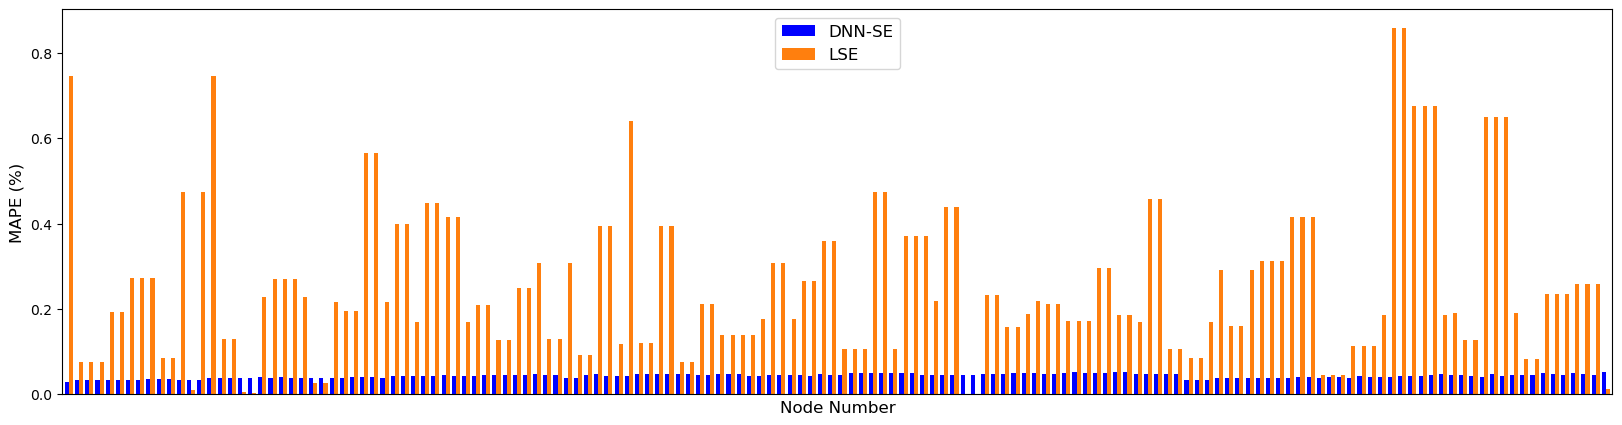

In [119]:
# create a DataFrame with the data
df = pd.DataFrame({'DNN-SE': mag_MAPE_phase_A,
                   'LSE': LSE_MAPE_phase_A})
colors = ['blue', '#ff7f0e']
# plot the data as a double bar chart
ax = df.plot(kind='bar', figsize=(20,5), width=0.8, color=colors)


# increase the font size of the x and y axis labels
ax.set_xlabel('Node Number', fontsize=12)
ax.set_ylabel('MAPE (%)', fontsize=12)

# set the legend to show above the chart
ax.legend(loc=9, fontsize=12)

# remove x-axis ticks
ax.set_xticks([])
ax.set_xticklabels([])

# show the chart
plt.show()

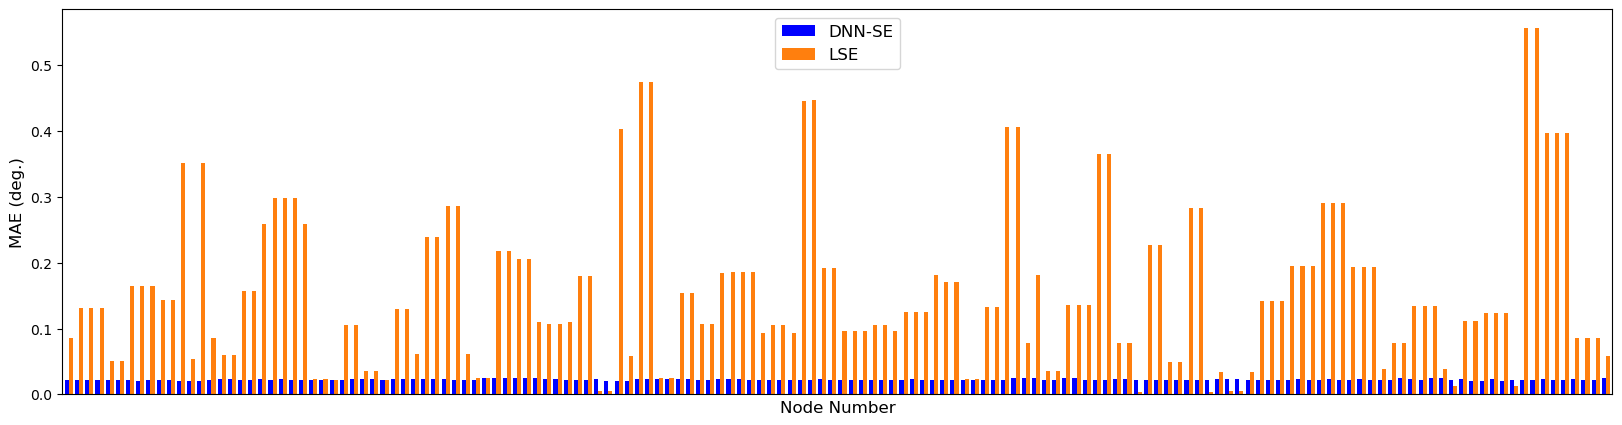

In [118]:
# create a DataFrame with the data
df = pd.DataFrame({'DNN-SE': ang_MAE_phase_A,
                   'LSE': LSE_MAE_phase_A})
colors = ['blue', '#ff7f0e']
# plot the data as a double bar chart
ax = df.plot(kind='bar', figsize=(20,5), width=0.8, color=colors)

# set the legend to show above the chart
ax.legend(loc=9, fontsize=12)

# increase the font size of the x and y axis labels
ax.set_xlabel('Node Number', fontsize=12)
ax.set_ylabel('MAE (deg.)', fontsize=12)


# remove x-axis ticks
ax.set_xticks([])
ax.set_xticklabels([])

# show the chart
plt.show()